In [1]:
import pandas as pd
df = pd.read_csv('sales.csv')
print(df.head())

   USERID   ORDERDATE     ORDERID  AMOUNTINFO
0  142074  2016-01-01  4196439032      9399.0
1   56927  2016-01-01  4198324983      8799.0
2   87058  2016-01-01  4191287379      6899.0
3  136104  2016-01-01  4198508313      5999.0
4  117831  2016-01-01  4202238313      5399.0


In [2]:
missing_data = df.isnull().sum()

print("Missing data in each column:")
print(missing_data)

missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing data:")
print(missing_percentage)

Missing data in each column:
USERID        0
ORDERDATE     2
ORDERID       0
AMOUNTINFO    8
dtype: int64

Percentage of missing data:
USERID        0.000000
ORDERDATE     0.002322
ORDERID       0.000000
AMOUNTINFO    0.009288
dtype: float64


In [3]:
print(df.isna().sum())

USERID        0
ORDERDATE     2
ORDERID       0
AMOUNTINFO    8
dtype: int64


In [4]:
print("Rows with missing data:")
print(df[df.isna().any(axis=1)])

Rows with missing data:
       USERID   ORDERDATE     ORDERID  AMOUNTINFO
20      75849  2016-01-01  4197103430         NaN
72     103714         NaN  4136159682       189.0
114    155209  2016-01-01  4177940815         NaN
229    139877         NaN  4111956196         6.3
233     54599  2016-01-01  4119525205         NaN
260     65456  2016-01-02  4195643356         NaN
62134  122134  2016-09-21  3826649773         NaN
70342  116995  2016-10-24  3981569421         NaN
80110   98888  2016-12-06  3814398698         NaN
86069  145951  2016-12-29  4139830098         NaN


In [5]:
most_frequent_date = df['ORDERDATE'].mode()[0]
df['ORDERDATE'] = df['ORDERDATE'].fillna(most_frequent_date)

mean_amount = df['AMOUNTINFO'].mean()
df['AMOUNTINFO'] = df['AMOUNTINFO'].fillna(mean_amount)

print("Data after filling missing values:")
print(df)


Data after filling missing values:
       USERID   ORDERDATE     ORDERID  AMOUNTINFO
0      142074  2016-01-01  4196439032      9399.0
1       56927  2016-01-01  4198324983      8799.0
2       87058  2016-01-01  4191287379      6899.0
3      136104  2016-01-01  4198508313      5999.0
4      117831  2016-01-01  4202238313      5399.0
...       ...         ...         ...         ...
86130  110416  2016-12-29  4111876729         3.9
86131  149172  2016-12-29  4182928398         0.5
86132   58525  2016-12-29  4080138429         0.5
86133  161732  2016-12-29  4193916074         0.5
86134   61176  2016-12-29  4195479740         0.5

[86135 rows x 4 columns]


In [6]:
print("Missing Data After Cleaning:")
print(df.isna().sum())
df_clean = df

Missing Data After Cleaning:
USERID        0
ORDERDATE     0
ORDERID       0
AMOUNTINFO    0
dtype: int64


In [7]:
X = df[['AMOUNTINFO', 'ORDERID']]
print(X.head())

   AMOUNTINFO     ORDERID
0      9399.0  4196439032
1      8799.0  4198324983
2      6899.0  4191287379
3      5999.0  4198508313
4      5399.0  4202238313


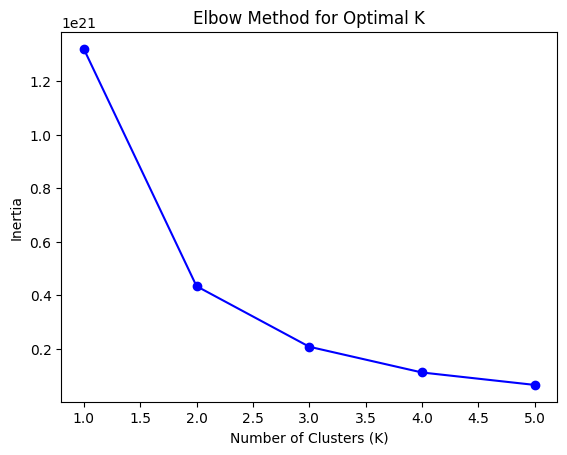

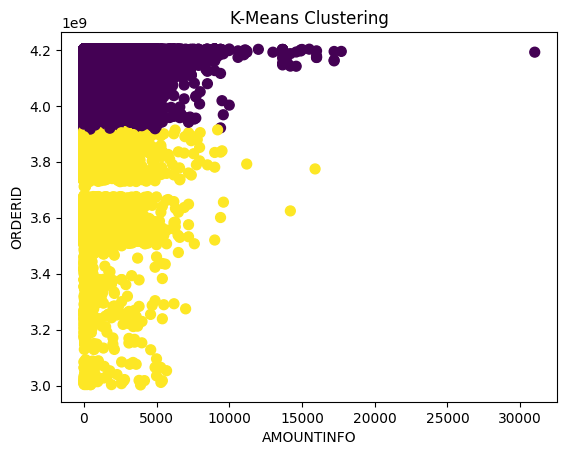

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine optimal number of clusters using Elbow Method
inertia = []
k_values = range(1, 6)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(X)


plt.scatter(X['AMOUNTINFO'], X['ORDERID'], c=df['Cluster_KMeans'], cmap='viridis', s=50)
plt.xlabel('AMOUNTINFO')
plt.ylabel('ORDERID')
plt.title('K-Means Clustering')
plt.show()

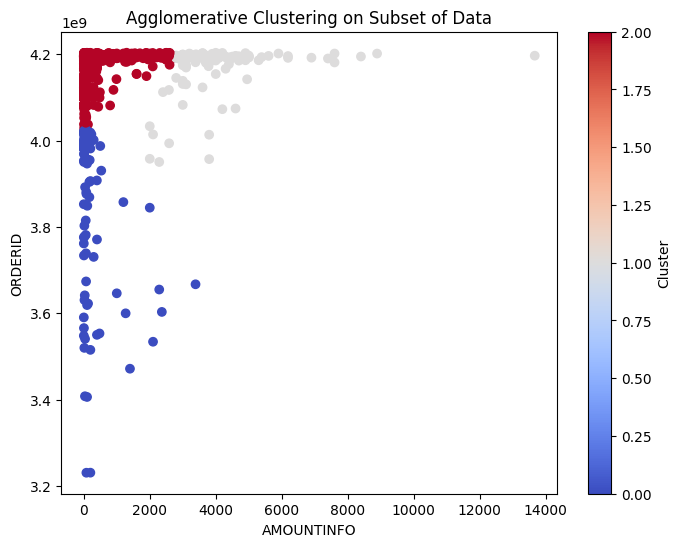

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

df_sample = df_clean.sample(n=1000, random_state=42)  # Adjust sample size as needed

# Select the relevant features for clustering
X_sample = df_sample[['AMOUNTINFO', 'ORDERID']]

# Standardize the data
scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(X_sample)

# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)  # Set the number of clusters
df_sample['Cluster_Agglomerative'] = agg_clustering.fit_predict(X_sample_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_sample['AMOUNTINFO'], df_sample['ORDERID'], c=df_sample['Cluster_Agglomerative'], cmap='coolwarm')
plt.xlabel('AMOUNTINFO')
plt.ylabel('ORDERID')
plt.title('Agglomerative Clustering on Subset of Data')
plt.colorbar(label='Cluster')
plt.show()


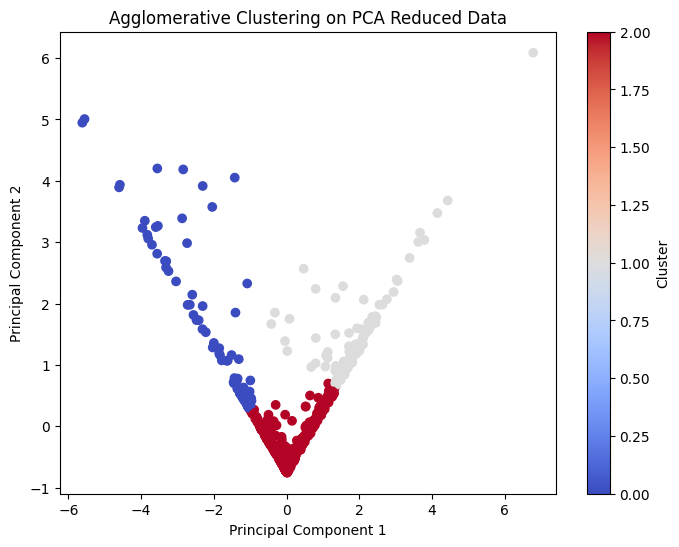

Explained variance ratio by PCA components: [0.56485044 0.43514956]


In [10]:
from sklearn.decomposition import PCA

df_sample = df_clean.sample(n=1000, random_state=42)  # Adjust sample size as needed

# Select the relevant features for clustering
X_sample = df_sample[['AMOUNTINFO', 'ORDERID']]

# Standardize the data
scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(X_sample)

# Apply PCA for dimensionality reduction (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample_scaled)

# Perform Agglomerative Clustering on the reduced data
agg_clustering = AgglomerativeClustering(n_clusters=3)  # Set the number of clusters
df_sample['Cluster_Agglomerative'] = agg_clustering.fit_predict(X_pca)

# Plot the clusters after dimensionality reduction
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_sample['Cluster_Agglomerative'], cmap='coolwarm')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Agglomerative Clustering on PCA Reduced Data')
plt.colorbar(label='Cluster')
plt.show()

# Check the explained variance ratio by PCA
print("Explained variance ratio by PCA components:", pca.explained_variance_ratio_)
